# Chapter 6. Multiple Sequence Alignment objects
This chapter is about Multiple Sequence Alignments, by which we mean a collection of multiple sequences
which have been aligned together – usually with the insertion of gap characters, and addition of leading or
trailing gaps – such that all the sequence strings are the same length. Such an alignment can be regarded
as a matrix of letters, where each row is held as a SeqRecord object internally.
We will introduce the MultipleSeqAlignment object which holds this kind of data, and the `Bio.AlignIO`
module for reading and writing them as various file formats (following the design of the `Bio.SeqIO` module
from the previous chapter). Note that both `Bio.SeqIO` and `Bio.AlignIO` can read and write sequence
alignment files. The appropriate choice will depend largely on what you want to do with the data.
The final part of this chapter is about our command line wrappers for common multiple sequence alignment tools like ClustalW and MUSCLE.

We have two functions for reading in sequence alignments, `Bio.AlignIO.read()` and `Bio.AlignIO.parse()`
which following the convention introduced in `Bio.SeqIO` are for files containing one or multiple alignments
respectively.

Using `Bio.AlignIO.parse()` will return an iterator which gives MultipleSeqAlignment objects. Iterators are typically used in a for loop. Examples of situations where you will have multiple different
alignments include resampled alignments from the PHYLIP tool seqboot, or multiple pairwise alignments
from the EMBOSS tools water or needle, or Bill Pearson’s FASTA tools.

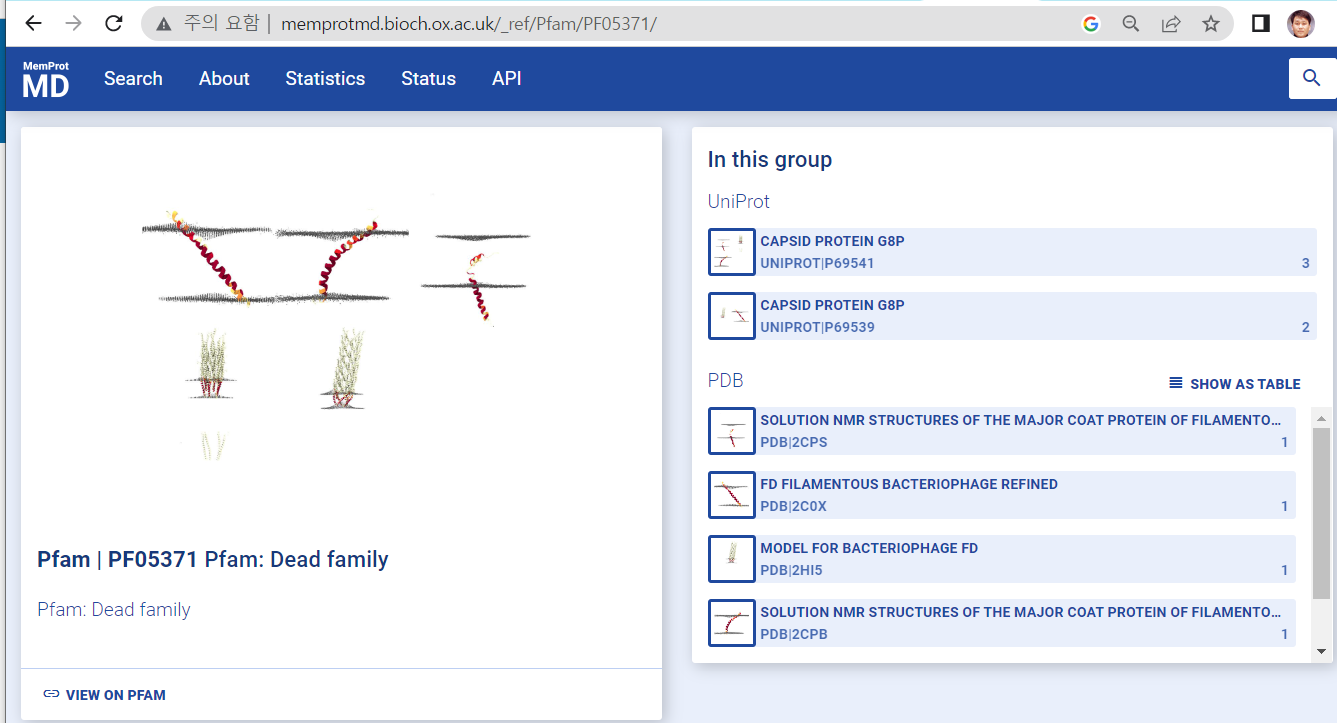
This is the seed alignment for the Phage Coat Gp8 (PF05371) PFAM entry, downloaded from a now out
of date release of PFAM from https://pfam.xfam.org/. We can load this file as follows (assuming it has
been saved to disk as “PF05371 seed.sth” in the current working directory):

## 6.1.1 Single Alignments
As an example, consider the following annotation rich protein alignment in the PFAM or Stockholm file format:
* To download test file : [`PF05371_seed.sth`](https://raw.githubusercontent.com/biopython/biopython/master/Doc/examples/PF05371_seed.sth)

```
# STOCKHOLM 1.0
#=GS COATB_BPIKE/30-81  AC P03620.1
#=GS COATB_BPIKE/30-81  DR PDB; 1ifl ; 1-52;
#=GS Q9T0Q8_BPIKE/1-52  AC Q9T0Q8.1
#=GS COATB_BPI22/32-83  AC P15416.1
#=GS COATB_BPM13/24-72  AC P69541.1
#=GS COATB_BPM13/24-72  DR PDB; 2cpb ; 1-49;
#=GS COATB_BPM13/24-72  DR PDB; 2cps ; 1-49;
#=GS COATB_BPZJ2/1-49   AC P03618.1
#=GS Q9T0Q9_BPFD/1-49   AC Q9T0Q9.1
#=GS Q9T0Q9_BPFD/1-49   DR PDB; 1nh4 A; 1-49;
#=GS COATB_BPIF1/22-73  AC P03619.2
#=GS COATB_BPIF1/22-73  DR PDB; 1ifk ; 1-50;
COATB_BPIKE/30-81      AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRLFKKFSSKA
#=GR COATB_BPIKE/30-81  SS  -HHHHHHHHHHHHHH--HHHHHHHH--HHHHHHHHHHHHHHHHHHHHH----
Q9T0Q8_BPIKE/1-52     AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKLFKKFVSRA
COATB_BPI22/32-83     DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRLFKKFSSKA
COATB_BPM13/24-72     AEGDDP...AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA
#=GR COATB_BPM13/24-72  SS  ---S-T...CHCHHHHCCCCTCCCTTCHHHHHHHHHHHHHHHHHHHHCTT--
COATB_BPZJ2/1-49     AEGDDP...AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFASKA
Q9T0Q9_BPFD/1-49     AEGDDP...AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA
#=GR Q9T0Q9_BPFD/1-49  SS  ------...-HHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHHH--
COATB_BPIF1/22-73     FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKLFKKFVSRA
#=GR COATB_BPIF1/22-73 SS XX-HHHH--HHHHHH--HHHHHHH--HHHHHHHHHHHHHHHHHHHHHHH---
#=GC SS_cons     XHHHHHHHHHHHHHHHCHHHHHHHHCHHHHHHHHHHHHHHHHHHHHHHHC--
#=GC seq_cons     AEssss...AptAhDSLpspAT-hIu.sWshVsslVsAsluIKLFKKFsSKA
//
```
This is the seed alignment for the Phage Coat Gp8 (PF05371) PFAM entry, downloaded from a now out of date release of PFAM from https://pfam.xfam.org/. We can load this file as follows (assuming it has been saved to disk as “PF05371 seed.sth” in the current working directory):

In [59]:
from Bio import AlignIO
alignment = AlignIO.read("PF05371_seed.sth", "stockholm")
print(alignment)

Alignment with 7 rows and 52 columns
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRL...SKA COATB_BPIKE/30-81
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKL...SRA Q9T0Q8_BPIKE/1-52
DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRL...SKA COATB_BPI22/32-83
AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPM13/24-72
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPZJ2/1-49
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA Q9T0Q9_BPFD/1-49
FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKL...SRA COATB_BPIF1/22-73


In [60]:
from Bio import AlignIO
alignment = AlignIO.read("PF05371_seed.sth", "stockholm")
print("Alignment length %i" % alignment.get_alignment_length())
for record in alignment:
    print("%s - %s" % (record.seq, record.id))

Alignment length 52
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRLFKKFSSKA - COATB_BPIKE/30-81
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKLFKKFVSRA - Q9T0Q8_BPIKE/1-52
DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRLFKKFSSKA - COATB_BPI22/32-83
AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA - COATB_BPM13/24-72
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFASKA - COATB_BPZJ2/1-49
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA - Q9T0Q9_BPFD/1-49
FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKLFKKFVSRA - COATB_BPIF1/22-73


You could also call Python’s built-in format function on the alignment object to show it in a particular file format – see Section 6.2.2 for details.

In [61]:
for record in alignment:
    if record.dbxrefs:
        print("%s %s" % (record.id, record.dbxrefs))

COATB_BPIKE/30-81 ['PDB; 1ifl ; 1-52;']
COATB_BPM13/24-72 ['PDB; 2cpb ; 1-49;', 'PDB; 2cps ; 1-49;']
Q9T0Q9_BPFD/1-49 ['PDB; 1nh4 A; 1-49;']
COATB_BPIF1/22-73 ['PDB; 1ifk ; 1-50;']


To have a look at all the sequence annotation, try this:

In [62]:
for record in alignment:
    print(record)

ID: COATB_BPIKE/30-81
Name: COATB_BPIKE
Description: COATB_BPIKE/30-81
Database cross-references: PDB; 1ifl ; 1-52;
Number of features: 0
/accession=P03620.1
/start=30
/end=81
Per letter annotation for: secondary_structure
Seq('AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRLFKKFSSKA')
ID: Q9T0Q8_BPIKE/1-52
Name: Q9T0Q8_BPIKE
Description: Q9T0Q8_BPIKE/1-52
Number of features: 0
/accession=Q9T0Q8.1
/start=1
/end=52
Seq('AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKLFKKFVSRA')
ID: COATB_BPI22/32-83
Name: COATB_BPI22
Description: COATB_BPI22/32-83
Number of features: 0
/accession=P15416.1
/start=32
/end=83
Seq('DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRLFKKFSSKA')
ID: COATB_BPM13/24-72
Name: COATB_BPM13
Description: COATB_BPM13/24-72
Database cross-references: PDB; 2cpb ; 1-49;, PDB; 2cps ; 1-49;
Number of features: 0
/accession=P69541.1
/start=24
/end=72
Per letter annotation for: secondary_structure
Seq('AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA')
ID: COATB_BPZJ2/1-49
Name: COATB_

PFAM provide a nice web interface at http://pfam.xfam.org/family/PF05371 which will actually let you download this alignment in several other formats. This is what the file looks like in the FASTA file format:
```
>COATB_BPIKE/30-81
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRLFKKFSSKA
>Q9T0Q8_BPIKE/1-52
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKLFKKFVSRA
>COATB_BPI22/32-83
DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRLFKKFSSKA
>COATB_BPM13/24-72
AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA
>COATB_BPZJ2/1-49
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFASKA
>Q9T0Q9_BPFD/1-49
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA
>COATB_BPIF1/22-73
FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKLFKKFVSRA
```

In [63]:
from Bio import AlignIO
alignment = AlignIO.read("PF05371_seed.faa", "fasta")
print(alignment)

Alignment with 7 rows and 52 columns
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRL...SKA COATB_BPIKE/30-81
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKL...SRA Q9T0Q8_BPIKE/1-52
DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRL...SKA COATB_BPI22/32-83
AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPM13/24-72
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPZJ2/1-49
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA Q9T0Q9_BPFD/1-49
FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKL...SRA COATB_BPIF1/22-73


With any supported file format, you can load an alignment in exactly the same way just by changing the format string. For example, use “phylip” for PHYLIP files, “nexus” for NEXUS files or “emboss” for the alignments output by the EMBOSS tools. There is a full listing on the wiki page (http://biopython.org/wiki/AlignIO) and in the built in documentation (also online):

In [64]:
from Bio import AlignIO
help(AlignIO)

Help on package Bio.AlignIO in Bio:

NAME
    Bio.AlignIO - Multiple sequence alignment input/output as alignment objects.

DESCRIPTION
    The Bio.AlignIO interface is deliberately very similar to Bio.SeqIO, and in
    fact the two are connected internally.  Both modules use the same set of file
    format names (lower case strings).  From the user's perspective, you can read
    in a PHYLIP file containing one or more alignments using Bio.AlignIO, or you
    can read in the sequences within these alignments using Bio.SeqIO.
    
    Bio.AlignIO is also documented at http://biopython.org/wiki/AlignIO and by
    a whole chapter in our tutorial:
    
    * `HTML Tutorial`_
    * `PDF Tutorial`_
    
    .. _`HTML Tutorial`: http://biopython.org/DIST/docs/tutorial/Tutorial.html
    .. _`PDF Tutorial`: http://biopython.org/DIST/docs/tutorial/Tutorial.pdf
    
    Input
    -----
    For the typical special case when your file or handle contains one and only
    one alignment, use the func

### 6.1.2 Multiple Alignments
Suppose you have a small alignment in PHYLIP format:
```
5        6
Alpha    AACAAC
Beta     AACCCC
Gamma    ACCAAC
Delta    CCACCA
Epsilon  CCAAAC
```

In [65]:
from Bio import AlignIO
alignments = AlignIO.parse("resampled.phy", "phylip")
for alignment in alignments:
    print(alignment)
    print()

Alignment with 5 rows and 6 columns
AAACCA Alpha
AAACCC Beta
ACCCCA Gamma
CCCAAC Delta
CCCAAA Epsilon

Alignment with 5 rows and 6 columns
AAACAA Alpha
AAACCC Beta
ACCCAA Gamma
CCCACC Delta
CCCAAA Epsilon

Alignment with 5 rows and 6 columns
AAAAAC Alpha
AAACCC Beta
AACAAC Gamma
CCCCCA Delta
CCCAAC Epsilon

Alignment with 5 rows and 6 columns
AAAACC Alpha
ACCCCC Beta
AAAACC Gamma
CCCCAA Delta
CAAACC Epsilon



As with the function `Bio.SeqIO.parse()`, using `Bio.AlignIO.parse()` returns an iterator. If you want to keep all the alignments in memory at once, which will allow you to access them in any order, then turn the iterator into a list:

In [66]:
from Bio import AlignIO
alignments = list(AlignIO.parse("resampled.phy", "phylip"))
last_align = alignments[-1]
first_align = alignments[0]

### 6.1.3 Ambiguous Alignments
Many alignment file formats can explicitly store more than one alignment, and the division between each alignment is clear. However, when a general sequence file format has been used there is no such block structure. The most common such situation is when alignments have been saved in the FASTA file format. For example consider the following:

```
>Alpha
ACTACGACTAGCTCAG--G
>Beta
ACTACCGCTAGCTCAGAAG
>Gamma
ACTACGGCTAGCACAGAAG
>Alpha
ACTACGACTAGCTCAGG--
>Beta
ACTACCGCTAGCTCAGAAG
>Gamma
ACTACGGCTAGCACAGAAG
```

```
>Alpha
ACTACGACTAGCTCAG--G
>Beta
ACTACCGCTAGCTCAGAAG
>Alpha
ACTACGACTAGCTCAGG--
>Gamma
ACTACGGCTAGCACAGAAG
>Alpha
ACTACGACTAGCTCAGG--
>Delta
ACTACGGCTAGCACAGAAG
```

```
>Alpha
ACTACGACTAGCTCAG--G
>XXX
ACTACCGCTAGCTCAGAAG
>Alpha
ACTACGACTAGCTCAGG
>YYY
ACTACGGCAAGCACAGG
>Alpha
--ACTACGAC--TAGCTCAGG
>ZZZ
GGACTACGACAATAGCTCAGG
```

To interpret these FASTA examples as several separate alignments, we can use `Bio.AlignIO.parse()` with the optional seq_count argument which specifies how many sequences are expected in each alignment
(in these examples, 3, 2 and 2 respectively). For example, using the third example as the input data:

In [68]:
handle = open("ex3.fasta", "r")
for alignment in AlignIO.parse(handle, "fasta", seq_count=2):
    print("Alignment length %i" % alignment.get_alignment_length())
    for record in alignment:
        print("%s - %s" % (record.seq, record.id))
    print()

Alignment length 19
ACTACGACTAGCTCAG--G - Alpha
ACTACCGCTAGCTCAGAAG - XXX

Alignment length 17
ACTACGACTAGCTCAGG - Alpha
ACTACGGCAAGCACAGG - YYY

Alignment length 21
--ACTACGAC--TAGCTCAGG - Alpha
GGACTACGACAATAGCTCAGG - ZZZ



## 6.2 Writing Alignments

In [69]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
align1 = MultipleSeqAlignment(
    [
        SeqRecord(Seq("ACTGCTAGCTAG"), id="Alpha"),
        SeqRecord(Seq("ACT-CTAGCTAG"), id="Beta"),
        SeqRecord(Seq("ACTGCTAGDTAG"), id="Gamma"),
    ]
)
align2 = MultipleSeqAlignment(
    [
        SeqRecord(Seq("GTCAGC-AG"), id="Delta"),
        SeqRecord(Seq("GACAGCTAG"), id="Epsilon"),
        SeqRecord(Seq("GTCAGCTAG"), id="Zeta"),
    ]
)
align3 = MultipleSeqAlignment(
    [
        SeqRecord(Seq("ACTAGTACAGCTG"), id="Eta"),
        SeqRecord(Seq("ACTAGTACAGCT-"), id="Theta"),
        SeqRecord(Seq("-CTACTACAGGTG"), id="Iota"),
    ]
)
my_alignments = [align1, align2, align3]

Now we have a list of Alignment objects, we’ll write them to a PHYLIP format file:

In [70]:
from Bio import AlignIO
AlignIO.write(my_alignments, "my_example.phy", "phylip")

3

### 6.2.1 Converting between sequence alignment file formats
For this example, we’ll load the PFAM/Stockholm format file used earlier and save it as a Clustal W format file:

In [71]:
from Bio import AlignIO
count = AlignIO.convert("PF05371_seed.sth", "stockholm", "PF05371_seed.aln", "clustal")
print("Converted %i alignments" % count)

Converted 1 alignments


Or, using `Bio.AlignIO.parse()` and `Bio.AlignIO.write()`:

In [72]:
from Bio import AlignIO
alignments = AlignIO.parse("PF05371_seed.sth", "stockholm")
count = AlignIO.write(alignments, "PF05371_seed.aln", "clustal")
print("Converted %i alignments" % count)

Converted 1 alignments


In [73]:
from Bio import AlignIO
alignment = AlignIO.read("PF05371_seed.sth", "stockholm")
AlignIO.write([alignment], "PF05371_seed.aln", "clustal")

1

In [74]:
from Bio import AlignIO
AlignIO.convert("PF05371_seed.sth", "stockholm", "PF05371_seed.phy", "phylip")

1

In [75]:
from Bio import AlignIO
AlignIO.convert("PF05371_seed.sth", "stockholm", "PF05371_seed.phy", "phylip-relaxed")

1

In [76]:
from Bio import AlignIO
alignment = AlignIO.read("PF05371_seed.sth", "stockholm")
name_mapping = {}
for i, record in enumerate(alignment):
    name_mapping[i] = record.id
    record.id = "seq%i" % i
print(name_mapping)
AlignIO.write([alignment], "PF05371_seed.phy", "phylip")

{0: 'COATB_BPIKE/30-81', 1: 'Q9T0Q8_BPIKE/1-52', 2: 'COATB_BPI22/32-83', 3: 'COATB_BPM13/24-72', 4: 'COATB_BPZJ2/1-49', 5: 'Q9T0Q9_BPFD/1-49', 6: 'COATB_BPIF1/22-73'}


1

### 6.2.2 Getting your alignment objects as formatted strings

In [77]:
from Bio import AlignIO
alignment = AlignIO.read("PF05371_seed.sth", "stockholm")
print(format(alignment, "clustal"))

CLUSTAL X (1.81) multiple sequence alignment


COATB_BPIKE/30-81                   AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRLFKKFSS
Q9T0Q8_BPIKE/1-52                   AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKLFKKFVS
COATB_BPI22/32-83                   DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRLFKKFSS
COATB_BPM13/24-72                   AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTS
COATB_BPZJ2/1-49                    AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFAS
Q9T0Q9_BPFD/1-49                    AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTS
COATB_BPIF1/22-73                   FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKLFKKFVS

COATB_BPIKE/30-81                   KA
Q9T0Q8_BPIKE/1-52                   RA
COATB_BPI22/32-83                   KA
COATB_BPM13/24-72                   KA
COATB_BPZJ2/1-49                    KA
Q9T0Q9_BPFD/1-49                    KA
COATB_BPIF1/22-73                   RA





In [78]:
from io import StringIO
from Bio import AlignIO
alignments = AlignIO.parse("PF05371_seed.sth", "stockholm")
out_handle = StringIO()
AlignIO.write(alignments, out_handle, "clustal")
clustal_data = out_handle.getvalue()
print(clustal_data)

CLUSTAL X (1.81) multiple sequence alignment


COATB_BPIKE/30-81                   AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRLFKKFSS
Q9T0Q8_BPIKE/1-52                   AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKLFKKFVS
COATB_BPI22/32-83                   DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRLFKKFSS
COATB_BPM13/24-72                   AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTS
COATB_BPZJ2/1-49                    AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFAS
Q9T0Q9_BPFD/1-49                    AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTS
COATB_BPIF1/22-73                   FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKLFKKFVS

COATB_BPIKE/30-81                   KA
Q9T0Q8_BPIKE/1-52                   RA
COATB_BPI22/32-83                   KA
COATB_BPM13/24-72                   KA
COATB_BPZJ2/1-49                    KA
Q9T0Q9_BPFD/1-49                    KA
COATB_BPIF1/22-73                   RA





## 6.3 Manipulating alignments
### 6.3.1 Slicing alignments

In [79]:
from Bio import AlignIO
alignment = AlignIO.read("PF05371_seed.sth", "stockholm")
print("Number of rows: %i" % len(alignment))
for record in alignment:
    print("%s - %s" % (record.seq, record.id))

Number of rows: 7
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRLFKKFSSKA - COATB_BPIKE/30-81
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKLFKKFVSRA - Q9T0Q8_BPIKE/1-52
DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRLFKKFSSKA - COATB_BPI22/32-83
AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA - COATB_BPM13/24-72
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFASKA - COATB_BPZJ2/1-49
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA - Q9T0Q9_BPFD/1-49
FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKLFKKFVSRA - COATB_BPIF1/22-73


In [80]:
print(alignment)

Alignment with 7 rows and 52 columns
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRL...SKA COATB_BPIKE/30-81
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKL...SRA Q9T0Q8_BPIKE/1-52
DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRL...SKA COATB_BPI22/32-83
AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPM13/24-72
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPZJ2/1-49
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA Q9T0Q9_BPFD/1-49
FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKL...SRA COATB_BPIF1/22-73


In [81]:
print(alignment[3:7])

Alignment with 4 rows and 52 columns
AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPM13/24-72
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPZJ2/1-49
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA Q9T0Q9_BPFD/1-49
FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKL...SRA COATB_BPIF1/22-73


In [82]:
print(alignment[2,6])

T


In [83]:
print(alignment[2].seq[6])

T


In [84]:
print(alignment[:, 6])

TTT---T


In [85]:
print(alignment[3:6, :6])

Alignment with 3 rows and 6 columns
AEGDDP COATB_BPM13/24-72
AEGDDP COATB_BPZJ2/1-49
AEGDDP Q9T0Q9_BPFD/1-49


In [86]:
print(alignment[:, :6])

Alignment with 7 rows and 6 columns
AEPNAA COATB_BPIKE/30-81
AEPNAA Q9T0Q8_BPIKE/1-52
DGTSTA COATB_BPI22/32-83
AEGDDP COATB_BPM13/24-72
AEGDDP COATB_BPZJ2/1-49
AEGDDP Q9T0Q9_BPFD/1-49
FAADDA COATB_BPIF1/22-73


In [87]:
print(alignment[:, 6:9])

Alignment with 7 rows and 3 columns
TNY COATB_BPIKE/30-81
TNY Q9T0Q8_BPIKE/1-52
TSY COATB_BPI22/32-83
--- COATB_BPM13/24-72
--- COATB_BPZJ2/1-49
--- Q9T0Q9_BPFD/1-49
TSQ COATB_BPIF1/22-73


In [88]:
print(alignment[:, 9:])

Alignment with 7 rows and 43 columns
ATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRLFKKFSSKA COATB_BPIKE/30-81
ATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKLFKKFVSRA Q9T0Q8_BPIKE/1-52
ATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRLFKKFSSKA COATB_BPI22/32-83
AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA COATB_BPM13/24-72
AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFASKA COATB_BPZJ2/1-49
AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA Q9T0Q9_BPFD/1-49
AKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKLFKKFVSRA COATB_BPIF1/22-73


In [89]:
edited = alignment[:, :6] + alignment[:, 9:]
print(edited)

Alignment with 7 rows and 49 columns
AEPNAAATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRLFKKFSSKA COATB_BPIKE/30-81
AEPNAAATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKLFKKFVSRA Q9T0Q8_BPIKE/1-52
DGTSTAATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRLFKKFSSKA COATB_BPI22/32-83
AEGDDPAKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA COATB_BPM13/24-72
AEGDDPAKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFASKA COATB_BPZJ2/1-49
AEGDDPAKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA Q9T0Q9_BPFD/1-49
FAADDAAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKLFKKFVSRA COATB_BPIF1/22-73


In [90]:
edited.sort()
print(edited)

Alignment with 7 rows and 49 columns
DGTSTAATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRLFKKFSSKA COATB_BPI22/32-83
FAADDAAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKLFKKFVSRA COATB_BPIF1/22-73
AEPNAAATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRLFKKFSSKA COATB_BPIKE/30-81
AEGDDPAKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA COATB_BPM13/24-72
AEGDDPAKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFASKA COATB_BPZJ2/1-49
AEPNAAATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKLFKKFVSRA Q9T0Q8_BPIKE/1-52
AEGDDPAKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA Q9T0Q9_BPFD/1-49


### 6.3.2 Alignments as arrays

In [91]:
import numpy as np
from Bio import AlignIO
alignment = AlignIO.read("PF05371_seed.sth", "stockholm")
align_array = np.array(alignment)
print("Array shape %i by %i" % align_array.shape)
align_array[:, :10] # doctest:+ELLIPSIS

Array shape 7 by 52


array([['A', 'E', 'P', 'N', 'A', 'A', 'T', 'N', 'Y', 'A'],
       ['A', 'E', 'P', 'N', 'A', 'A', 'T', 'N', 'Y', 'A'],
       ['D', 'G', 'T', 'S', 'T', 'A', 'T', 'S', 'Y', 'A'],
       ['A', 'E', 'G', 'D', 'D', 'P', '-', '-', '-', 'A'],
       ['A', 'E', 'G', 'D', 'D', 'P', '-', '-', '-', 'A'],
       ['A', 'E', 'G', 'D', 'D', 'P', '-', '-', '-', 'A'],
       ['F', 'A', 'A', 'D', 'D', 'A', 'T', 'S', 'Q', 'A']], dtype='<U1')

## 6.4 Getting information on the alignment
### 6.4.1 Substitutions
The `substitutions` property of an alignment reports how often letters in the alignment are substituted for each other. This is calculated by taking all pairs of rows in the alignment, counting the number of times two letters are aligned to each other, and summing this over all pairs. For example,

In [92]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
alignment = MultipleSeqAlignment(
    [
        SeqRecord(Seq("ACTCCTA"), id="seq1"),
        SeqRecord(Seq("AAT-CTA"), id="seq2"),
        SeqRecord(Seq("CCTACT-"), id="seq3"),
        SeqRecord(Seq("TCTCCTC"), id="seq4"),
    ]
)
print(alignment)

Alignment with 4 rows and 7 columns
ACTCCTA seq1
AAT-CTA seq2
CCTACT- seq3
TCTCCTC seq4


In [93]:
substitutions = alignment.substitutions
print(substitutions)

    A    C    T
A 2.0  4.5  1.0
C 4.5 10.0  0.5
T 1.0  0.5 12.0



In [94]:
m = substitutions.select("ATCG")
print(m)

    A    T    C   G
A 2.0  1.0  4.5 0.0
T 1.0 12.0  0.5 0.0
C 4.5  0.5 10.0 0.0
G 0.0  0.0  0.0 0.0



## 6.5 Alignment Tools

In [95]:
import Bio.Align.Applications
dir(Bio.Align.Applications) # doctest:+ELLIPSIS

['ClustalOmegaCommandline',
 'ClustalwCommandline',
 'DialignCommandline',
 'MSAProbsCommandline',
 'MafftCommandline',
 'MuscleCommandline',
 'PrankCommandline',
 'ProbconsCommandline',
 'TCoffeeCommandline',
 '_ClustalOmega',
 '_Clustalw',
 '_Dialign',
 '_MSAProbs',
 '_Mafft',
 '_Muscle',
 '_Prank',
 '_Probcons',
 '_TCoffee',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__']

### 6.5.1 ClustalW
ClustalW is a popular command line tool for multiple sequence alignment (there is also a graphical interface called ClustalX). Biopython’s Bio.Align.Applications module has a wrapper for this alignment tool (and several others).

In [96]:
from Bio.Align.Applications import ClustalwCommandline
help(ClustalwCommandline)

Help on class ClustalwCommandline in module Bio.Align.Applications._Clustalw:

class ClustalwCommandline(Bio.Application.AbstractCommandline)
 |  ClustalwCommandline(cmd='clustalw', **kwargs)
 |  
 |  Command line wrapper for clustalw (version one or two).
 |  
 |  http://www.clustal.org/
 |  
 |  Notes
 |  -----
 |  Last checked against versions: 1.83 and 2.1
 |  
 |  References
 |  ----------
 |  Larkin MA, Blackshields G, Brown NP, Chenna R, McGettigan PA,
 |  McWilliam H, Valentin F, Wallace IM, Wilm A, Lopez R, Thompson JD,
 |  Gibson TJ, Higgins DG. (2007). Clustal W and Clustal X version 2.0.
 |  Bioinformatics, 23, 2947-2948.
 |  
 |  Examples
 |  --------
 |  >>> from Bio.Align.Applications import ClustalwCommandline
 |  >>> in_file = "unaligned.fasta"
 |  >>> clustalw_cline = ClustalwCommandline("clustalw2", infile=in_file)
 |  >>> print(clustalw_cline)
 |  clustalw2 -infile=unaligned.fasta
 |  
 |  You would typically run the command line with clustalw_cline() or via
 |  the

By default ClustalW will generate an alignment and guide tree file with names based on the input FASTA file, in this case opuntia.aln and opuntia.dnd, but you can override this or make it explicit:
* To download test file : [`opuntia.fasta`](https://github.com/biopython/biopython/blob/master/Doc/examples/opuntia.fasta), [`opuntia.aln`](https://github.com/biopython/biopython/blob/master/Doc/examples/opuntia.aln), [`opuntia.dnd`](https://github.com/biopython/biopython/blob/master/Doc/examples/opuntia.dnd)

In [97]:
from Bio.Align.Applications import ClustalwCommandline
cline = ClustalwCommandline("clustalw2", infile="opuntia.fasta")
print(cline)

clustalw2 -infile=opuntia.fasta


In [ ]:
# Run this codes if the command above got errors and your OS is Windows
import os
from Bio.Align.Applications import ClustalwCommandline
clustalw_exe = r"C:\Program Files\new clustal\clustalw2.exe"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile="opuntia.fasta")

assert os.path.isfile(clustalw_exe), "Clustal W executable missing"
stdout, stderr = clustalw_cline()

What we care about are the two output files, the alignment and the guide tree. We didn’t tell ClustalW what filenames to use, but it defaults to picking names based on the input file. In this case the output should
be in the file opuntia.aln. You should be able to work out how to read in the alignment using `Bio.AlignIO` by now:

In [99]:
from Bio import AlignIO
align = AlignIO.read("opuntia.aln", "clustal")
print(align)

Alignment with 7 rows and 906 columns
TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273289|gb|AF191663.1|AF19166
TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273291|gb|AF191665.1|AF19166
TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273290|gb|AF191664.1|AF19166
TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273287|gb|AF191661.1|AF19166
TATACATAAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273286|gb|AF191660.1|AF19166
TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273285|gb|AF191659.1|AF19165
TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273284|gb|AF191658.1|AF19165


In [100]:
from Bio import Phylo
tree = Phylo.read("opuntia.dnd", "newick")
Phylo.draw_ascii(tree)

                             _______________ gi|6273291|gb|AF191665.1|AF191665
  __________________________|
 |                          |   ______ gi|6273290|gb|AF191664.1|AF191664
 |                          |__|
 |                             |_____ gi|6273289|gb|AF191663.1|AF191663
 |
_|_________________ gi|6273287|gb|AF191661.1|AF191661
 |
 |__________ gi|6273286|gb|AF191660.1|AF191660
 |
 |    __ gi|6273285|gb|AF191659.1|AF191659
 |___|
     | gi|6273284|gb|AF191658.1|AF191658



### 6.5.2 MUSCLE
MUSCLE is a more recent multiple sequence alignment tool than ClustalW, and Biopython also has a wrapper for it under the Bio.Align.Applications module. As before, we recommend you try using MUSCLE from the command line before trying it from within Python, as the Biopython wrapper is very faithful to the actual command line API:

In [54]:
from Bio.Align.Applications import MuscleCommandline
help(MuscleCommandline)

Help on class MuscleCommandline in module Bio.Align.Applications._Muscle:

class MuscleCommandline(Bio.Application.AbstractCommandline)
 |  MuscleCommandline(cmd='muscle', **kwargs)
 |  
 |  Command line wrapper for the multiple alignment program MUSCLE.
 |  
 |  http://www.drive5.com/muscle/
 |  
 |  Notes
 |  -----
 |  Last checked against version: 3.7, briefly against 3.8
 |  
 |  References
 |  ----------
 |  Edgar, Robert C. (2004), MUSCLE: multiple sequence alignment with high
 |  accuracy and high throughput, Nucleic Acids Research 32(5), 1792-97.
 |  
 |  Edgar, R.C. (2004) MUSCLE: a multiple sequence alignment method with
 |  reduced time and space complexity. BMC Bioinformatics 5(1): 113.
 |  
 |  Examples
 |  --------
 |  >>> from Bio.Align.Applications import MuscleCommandline
 |  >>> muscle_exe = r"C:\Program Files\Alignments\muscle3.8.31_i86win32.exe"
 |  >>> in_file = r"C:\My Documents\unaligned.fasta"
 |  >>> out_file = r"C:\My Documents\aligned.fasta"
 |  >>> muscle_cl

For the most basic usage, all you need is to have a FASTA input file, such as [opuntia.fasta](https://raw.githubusercontent.com/biopython/biopython/master/Doc/examples/opuntia.fasta) (available online or in the Doc/examples subdirectory of the Biopython source code). You can then tell MUSCLE to read in this FASTA file, and write the alignment to an output file:

In [55]:
from Bio.Align.Applications import MuscleCommandline
cline = MuscleCommandline(input="opuntia.fasta", out="opuntia.txt")
print(cline)

muscle -in opuntia.fasta -out opuntia.txt


By default MUSCLE will output the alignment as a FASTA file (using gapped sequences). The `Bio.AlignIO` module should be able to read this alignment using format="fasta". You can also ask for ClustalW-like output:

In [56]:
from Bio.Align.Applications import MuscleCommandline
cline = MuscleCommandline(input="opuntia.fasta", out="opuntia.aln", clw=True)
print(cline)

muscle -in opuntia.fasta -out opuntia.aln -clw


Or, strict ClustalW output where the original ClustalW header line is used for maximum compatibility:

In [57]:
from Bio.Align.Applications import MuscleCommandline
cline = MuscleCommandline(input="opuntia.fasta", out="opuntia.aln", clwstrict=True)
print(cline)

muscle -in opuntia.fasta -out opuntia.aln -clwstrict


### 6.5.3 MUSCLE using stdout

In [58]:
from Bio.Align.Applications import MuscleCommandline
muscle_cline = MuscleCommandline(input="opuntia.fasta")
print(muscle_cline)

muscle -in opuntia.fasta


In [103]:
from Bio.Align.Applications import MuscleCommandline
# got `muscle -in opuntia.fasta`
muscle_cline = MuscleCommandline(input="opuntia.fasta")
stdout, stderr = muscle_cline()
from io import StringIO
from Bio import AlignIO
align = AlignIO.read(StringIO(stdout), "fasta")
print(align)

Alignment with 7 rows and 906 columns
TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273289|gb|AF191663.1|AF191663
TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273291|gb|AF191665.1|AF191665
TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273290|gb|AF191664.1|AF191664
TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273287|gb|AF191661.1|AF191661
TATACATAAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273286|gb|AF191660.1|AF191660
TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273285|gb|AF191659.1|AF191659
TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273284|gb|AF191658.1|AF191658


The above approach is fairly simple, but if you are dealing with very large output text the fact that all of stdout and stderr is loaded into memory as a string can be a potential drawback. Using the subprocess
module we can work directly with handles instead:

In [105]:
import subprocess
import sys
from Bio.Align.Applications import MuscleCommandline
muscle_cline = MuscleCommandline(input="opuntia.fasta")
child = subprocess.Popen(
    str(muscle_cline),
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE,
    text=True,
    shell=(sys.platform != "win32"),
)

from Bio import AlignIO
align = AlignIO.read(child.stdout, "fasta")
print(align)

Alignment with 7 rows and 906 columns
TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273289|gb|AF191663.1|AF191663
TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273291|gb|AF191665.1|AF191665
TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273290|gb|AF191664.1|AF191664
TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273287|gb|AF191661.1|AF191661
TATACATAAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273286|gb|AF191660.1|AF191660
TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273285|gb|AF191659.1|AF191659
TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273284|gb|AF191658.1|AF191658


### 6.5.4 MUSCLE using stdin and stdout

In [1]:
from Bio import SeqIO
records = (r for r in SeqIO.parse("opuntia.fasta", "fasta") if len(r) < 900)

In [2]:
from Bio.Align.Applications import MuscleCommandline
muscle_cline = MuscleCommandline(clwstrict=True)
print(muscle_cline)

muscle -clwstrict


Now for the fiddly bits using the subprocess module, stdin and stdout:

In [3]:
import subprocess
import sys
child = subprocess.Popen(
    str(muscle_cline),
    stdin=subprocess.PIPE,
    stdout=subprocess.PIPE,
    stderr=subprocess.PIPE,
    text=True,
    shell=(sys.platform != "win32"),
)

In [4]:
SeqIO.write(records, child.stdin, "fasta")
child.stdin.close()

In [5]:
from Bio import AlignIO
align = AlignIO.read(child.stdout, "clustal")
print(align)

Alignment with 6 rows and 900 columns
TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273290|gb|AF191664.1|AF19166
TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273289|gb|AF191663.1|AF19166
TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273287|gb|AF191661.1|AF19166
TATACATAAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273286|gb|AF191660.1|AF19166
TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273285|gb|AF191659.1|AF19165
TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273284|gb|AF191658.1|AF19165


In [127]:
from Bio import SeqIO
records = (r for r in SeqIO.parse("opuntia.fasta", "fasta") if len(r) < 900)
from io import StringIO
handle = StringIO()
SeqIO.write(records, handle, "fasta")
data = handle.getvalue()

In [128]:
stdout, stderr = muscle_cline(stdin=data)
from Bio import AlignIO
align = AlignIO.read(StringIO(stdout), "clustal")
print(align)

Alignment with 6 rows and 900 columns
TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273290|gb|AF191664.1|AF19166
TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273289|gb|AF191663.1|AF19166
TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273287|gb|AF191661.1|AF19166
TATACATAAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273286|gb|AF191660.1|AF19166
TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273285|gb|AF191659.1|AF19165
TATACATTAAAGAAGGGGGATGCGGATAAATGGAAAGGCGAAAG...AGA gi|6273284|gb|AF191658.1|AF19165


### 6.5.5 EMBOSS needle and water
The [EMBOSS](http://emboss.sourceforge.net/) suite includes the water and needle tools for Smith-Waterman algorithm local alignment, and Needleman-Wunsch global alignment. The tools share the same style interface, so switching between the two is trivial – we’ll just use needle here.

Suppose you want to do a global pairwise alignment between two sequences, prepared in FASTA format as follows:
```
>HBA_HUMAN
MVLSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHFDLSHGSAQVKGHG
KKVADALTNAVAHVDDMPNALSALSDLHAHKLRVDPVNFKLLSHCLLVTLAAHLPAEFTP
AVHASLDKFLASVSTVLTSKYR
```
in a file `alpha.faa`, and secondly in a file `beta.faa`:
```
>HBB_HUMAN
MVHLTPEEKSAVTALWGKVNVDEVGGEALGRLLVVYPWTQRFFESFGDLSTPDAVMGNPK
VKAHGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHHFG
KEFTPPVQAAYQKVVAGVANALAHKYH
```
You can find copies of these example files(`alpha.faa`, `beta.faa`) with the Biopython source code under the [`Doc/examples/`](https://github.com/biopython/biopython/tree/master/Doc/examples) directory.

Let’s start by creating a complete needle command line object in one go:

In [129]:
from Bio.Emboss.Applications import NeedleCommandline
needle_cline = NeedleCommandline(
    asequence="alpha.faa",
    bsequence="beta.faa",
    gapopen=10,
    gapextend=0.5,
    outfile="needle.txt",
)
print(needle_cline)

needle -outfile=needle.txt -asequence=alpha.faa -bsequence=beta.faa -gapopen=10 -gapextend=0.5


Even if you have EMBOSS installed, running this command may not work – you might get a message about “command not found” (especially on Windows). This probably means that the EMBOSS tools are not on your PATH environment variable. You can either update your PATH setting, or simply tell Biopython
the full path to the tool, for example:

In [130]:
from Bio.Emboss.Applications import NeedleCommandline
needle_cline = NeedleCommandline(
    r"C:\EMBOSS\needle.exe",
    asequence="alpha.faa",
    bsequence="beta.faa",
    gapopen=10,
    gapextend=0.5,
    outfile="needle.txt",
)

At this point it might help to try running the EMBOSS tools yourself by hand at the command line, to familiarize yourself the other options and compare them to the Biopython help text:

In [131]:
from Bio.Emboss.Applications import NeedleCommandline
help(NeedleCommandline)

Help on class NeedleCommandline in module Bio.Emboss.Applications:

class NeedleCommandline(_EmbossCommandLine)
 |  NeedleCommandline(cmd='needle', **kwargs)
 |  
 |  Commandline object for the needle program from EMBOSS.
 |  
 |  Method resolution order:
 |      NeedleCommandline
 |      _EmbossCommandLine
 |      _EmbossMinimalCommandLine
 |      Bio.Application.AbstractCommandline
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, cmd='needle', **kwargs)
 |      Initialize the class.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  aformat
 |      Display output in a different specified output format
 |      
 |      This controls the addition of the -aformat parameter and its associated value.  Set this property to the argument value required.
 |  
 |  asequence
 |      First sequence to align
 |      
 |      This controls the addition of the -asequence parameter and its associat

Note that you can also specify (or change or look at) the settings like this:

In [132]:
from Bio.Emboss.Applications import NeedleCommandline
needle_cline = NeedleCommandline()
needle_cline.asequence = "alpha.faa"
needle_cline.bsequence = "beta.faa"
needle_cline.gapopen = 10
needle_cline.gapextend = 0.5
needle_cline.outfile = "needle.txt"
print(needle_cline)
print(needle_cline.outfile)

needle -outfile=needle.txt -asequence=alpha.faa -bsequence=beta.faa -gapopen=10 -gapextend=0.5
needle.txt


Next we want to use Python to run this command for us. As explained above, for full control, we recommend you use the built in Python subprocess module, but for simple usage the wrapper object usually suffices:

In [135]:
stdout, stderr = needle_cline()
print(stdout + stderr)

Needleman-Wunsch global alignment of two sequences



Next we can load the output file with Bio.AlignIO as discussed earlier in this chapter, as the `emboss` format:

In [136]:
from Bio import AlignIO
align = AlignIO.read("needle.txt", "emboss")
print(align)

Alignment with 2 rows and 149 columns
MV-LSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTY...KYR HBA_HUMAN
MVHLTPEEKSAVTALWGKV--NVDEVGGEALGRLLVVYPWTQRF...KYH HBB_HUMAN


## 6.6 Pairwise sequence alignment
### 6.6.1 Basic usage

In [137]:
from Bio import Align
aligner = Align.PairwiseAligner()

The `PairwiseAligner` object aligner (see Section 6.6.2) stores the alignment parameters to be used for the pairwise alignments.
These attributes can be set in the constructor of the object or after the object is made.

In [138]:
aligner = Align.PairwiseAligner(match_score=1.0)
# Or, equivalently:
aligner.match_score = 1.0

Use the `aligner.score` method to calculate the alignment score between two sequences:

In [139]:
target = "GAACT"
query = "GAT"
score = aligner.score(target, query)
score

3.0

To see the actual alignments, use the `aligner.align` method and iterate over the `Alignment` objects returned:

In [140]:
alignments = aligner.align(target, query)
for alignment in alignments:
    print(alignment)

target            0 GAACT 5
                  0 ||--| 5
query             0 GA--T 3

target            0 GAACT 5
                  0 |-|-| 5
query             0 G-A-T 3



By default, a global pairwise alignment is performed, which finds the optimal alignment over the whole length of `target` and query. Instead, a local alignment will find the subsequence of target and query with the highest alignment score. Local alignments can be generated by setting `aligner.mode` to "local":

In [141]:
aligner.mode = "local"
target = "AGAACTC"
query = "GAACT"
score = aligner.score(target, query)
print(score)

alignments = aligner.align(target, query)
for alignment in alignments:
    print(alignment)

5.0
target            1 GAACT 6
                  0 ||||| 5
query             0 GAACT 5



### 6.6.2 The pairwise aligner object

In [142]:
print(aligner)

Pairwise sequence aligner with parameters
  wildcard: None
  match_score: 1.000000
  mismatch_score: 0.000000
  target_internal_open_gap_score: 0.000000
  target_internal_extend_gap_score: 0.000000
  target_left_open_gap_score: 0.000000
  target_left_extend_gap_score: 0.000000
  target_right_open_gap_score: 0.000000
  target_right_extend_gap_score: 0.000000
  query_internal_open_gap_score: 0.000000
  query_internal_extend_gap_score: 0.000000
  query_left_open_gap_score: 0.000000
  query_left_extend_gap_score: 0.000000
  query_right_open_gap_score: 0.000000
  query_right_extend_gap_score: 0.000000
  mode: local



In [143]:
aligner.algorithm

'Smith-Waterman'

In [144]:
aligner.epsilon

1e-06

### 6.6.3 Substitution scores
Substitution scores define the value to be added to the total score when two letters (nucleotides or amino acids) are aligned to each other. The substitution scores to be used by the `PairwiseAligner` can be specified in two ways:


*   By specifying a match score for identical letters, and a mismatch scores for mismatched letters. Nucleotide sequence alignments are typically based on match and mismatch scores. For example, by default BLAST [26] uses a match score of +1 and a mismatch score of −2 for nucleotide alignments by megablast, with a gap penalty of 2.5 (see section 6.6.4 for more information on gap scores). Match and mismatch scores can be specified by setting the `match` and `mismatch` attributes of the `PairwiseAligner` object:



In [145]:
from Bio import Align
aligner = Align.PairwiseAligner()
aligner.match_score

1.0

In [146]:
aligner.mismatch_score

0.0

In [147]:
score = aligner.score("ACGT", "ACAT")
print(score)

3.0


In [148]:
aligner.match_score = 1.0
aligner.mismatch_score = -2.0
aligner.gap_score = -2.5
score = aligner.score("ACGT", "ACAT")
print(score)

1.0


*   Alternatively, you can use the `substitution_matrix` attribute of the `PairwiseAligner` object to specify a substitution matrix. This allows you to apply different scores for different pairs of matched and mismatched letters. This is typically used for amino acid sequence alignments. For example, by default BLAST [26] uses the BLOSUM62 substitution matrix for protein alignments by blastp. This substitution matrix is available from Biopython:

In [149]:
from Bio.Align import substitution_matrices
substitution_matrices.load() # doctest: +ELLIPSIS

['BENNER22',
 'BENNER6',
 'BENNER74',
 'BLASTN',
 'BLASTP',
 'BLOSUM45',
 'BLOSUM50',
 'BLOSUM62',
 'BLOSUM80',
 'BLOSUM90',
 'DAYHOFF',
 'FENG',
 'GENETIC',
 'GONNET1992',
 'HOXD70',
 'JOHNSON',
 'JONES',
 'LEVIN',
 'MCLACHLAN',
 'MDM78',
 'MEGABLAST',
 'NUC.4.4',
 'PAM250',
 'PAM30',
 'PAM70',
 'RAO',
 'RISLER',
 'SCHNEIDER',
 'STR',
 'TRANS']

In [150]:
matrix = substitution_matrices.load("BLOSUM62")
print(matrix) # doctest: +ELLIPSIS

#  Matrix made by matblas from blosum62.iij
#  * column uses minimum score
#  BLOSUM Clustered Scoring Matrix in 1/2 Bit Units
#  Blocks Database = /data/blocks_5.0/blocks.dat
#  Cluster Percentage: >= 62
#  Entropy =   0.6979, Expected =  -0.5209
     A    R    N    D    C    Q    E    G    H    I    L    K    M    F    P    S    T    W    Y    V    B    Z    X    *
A  4.0 -1.0 -2.0 -2.0  0.0 -1.0 -1.0  0.0 -2.0 -1.0 -1.0 -1.0 -1.0 -2.0 -1.0  1.0  0.0 -3.0 -2.0  0.0 -2.0 -1.0  0.0 -4.0
R -1.0  5.0  0.0 -2.0 -3.0  1.0  0.0 -2.0  0.0 -3.0 -2.0  2.0 -1.0 -3.0 -2.0 -1.0 -1.0 -3.0 -2.0 -3.0 -1.0  0.0 -1.0 -4.0
N -2.0  0.0  6.0  1.0 -3.0  0.0  0.0  0.0  1.0 -3.0 -3.0  0.0 -2.0 -3.0 -2.0  1.0  0.0 -4.0 -2.0 -3.0  3.0  0.0 -1.0 -4.0
D -2.0 -2.0  1.0  6.0 -3.0  0.0  2.0 -1.0 -1.0 -3.0 -4.0 -1.0 -3.0 -3.0 -1.0  0.0 -1.0 -4.0 -3.0 -3.0  4.0  1.0 -1.0 -4.0
C  0.0 -3.0 -3.0 -3.0  9.0 -3.0 -4.0 -3.0 -3.0 -1.0 -1.0 -3.0 -1.0 -2.0 -3.0 -1.0 -1.0 -2.0 -2.0 -1.0 -3.0 -3.0 -2.0 -4.0
Q -1.0  1.0  0.0  0.

In [151]:
aligner.substitution_matrix = matrix
score = aligner.score("ACDQ", "ACDQ")
score

24.0

In [152]:
score = aligner.score("ACDQ", "ACNQ")
score

19.0

In [153]:
matrix["D", "X"]

-1.0

In [154]:
score = aligner.score("ACDQ", "ACXQ")
score

17.0

### 6.6.5 General gap scores

In [155]:
from Bio import Align
aligner = Align.PairwiseAligner()

In [156]:
def my_gap_score_function(start, length):
    if start == 2:
        return -1000
    else:
        return -1 * length
aligner.query_gap_score = my_gap_score_function
alignments = aligner.align("AACTT", "AATT")
for alignment in alignments:
    print(alignment)

target            0 AACTT 5
                  0 -|.|| 5
query             0 -AATT 4

target            0 AACTT 5
                  0 |-.|| 5
query             0 A-ATT 4

target            0 AACTT 5
                  0 ||.-| 5
query             0 AAT-T 4

target            0 AACTT 5
                  0 ||.|- 5
query             0 AATT- 4



### 6.6.6 Using a pre-defined substitution matrix and gap scores

In [157]:
from Bio import Align
aligner = Align.PairwiseAligner(scoring="blastn")
print(aligner) # doctest:+ELLIPSIS

Pairwise sequence aligner with parameters
  substitution_matrix: <Array object at 0x7f3e01142c80>
  target_internal_open_gap_score: -7.000000
  target_internal_extend_gap_score: -2.000000
  target_left_open_gap_score: -7.000000
  target_left_extend_gap_score: -2.000000
  target_right_open_gap_score: -7.000000
  target_right_extend_gap_score: -2.000000
  query_internal_open_gap_score: -7.000000
  query_internal_extend_gap_score: -2.000000
  query_left_open_gap_score: -7.000000
  query_left_extend_gap_score: -2.000000
  query_right_open_gap_score: -7.000000
  query_right_extend_gap_score: -2.000000
  mode: global



In [158]:
print(aligner.substitution_matrix[:, :])

     A    T    G    C    S    W    R    Y    K    M    B    V    H    D    N
A  2.0 -3.0 -3.0 -3.0 -3.0 -1.0 -1.0 -3.0 -3.0 -1.0 -3.0 -1.0 -1.0 -1.0 -2.0
T -3.0  2.0 -3.0 -3.0 -3.0 -1.0 -3.0 -1.0 -1.0 -3.0 -1.0 -3.0 -1.0 -1.0 -2.0
G -3.0 -3.0  2.0 -3.0 -1.0 -3.0 -1.0 -3.0 -1.0 -3.0 -1.0 -1.0 -3.0 -1.0 -2.0
C -3.0 -3.0 -3.0  2.0 -1.0 -3.0 -3.0 -1.0 -3.0 -1.0 -1.0 -1.0 -1.0 -3.0 -2.0
S -3.0 -3.0 -1.0 -1.0 -1.0 -3.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -2.0
W -1.0 -1.0 -3.0 -3.0 -3.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -2.0
R -1.0 -3.0 -1.0 -3.0 -1.0 -1.0 -1.0 -3.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -2.0
Y -3.0 -1.0 -3.0 -1.0 -1.0 -1.0 -3.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -2.0
K -3.0 -1.0 -1.0 -3.0 -1.0 -1.0 -1.0 -1.0 -1.0 -3.0 -1.0 -1.0 -1.0 -1.0 -2.0
M -1.0 -3.0 -3.0 -1.0 -1.0 -1.0 -1.0 -1.0 -3.0 -1.0 -1.0 -1.0 -1.0 -1.0 -2.0
B -3.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -2.0
V -1.0 -3.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -2.0

### 6.6.7 Iterating over alignments

The alignments returned by `aligner.align` are a kind of immutable iterable objects (similar to `range`). While they appear similar to a tuple or list of `Alignment` objects, they are different in the sense that each `Alignment` object is created dynamically when it is needed. This approach was chosen because the number of alignments can be extremely large, in particular for poor alignments (see Section 6.6.10 for an example).

You can perform the following operations on `alignments`:
* `len(alignments)` returns the number of alignments stored. This function returns quickly, even if the number of alignments is huge. If the number of alignments is extremely large (typically, larger than 9,223,372,036,854,775,807, which is the largest integer that can be stored as a long int on 64 bit machines), `len(alignments)` will raise an OverflowError. A large number of alignments suggests that the alignment quality is low.

In [159]:
from Bio import Align
aligner = Align.PairwiseAligner()
alignments = aligner.align("AAA", "AA")
len(alignments)

3

* You can extract a specific alignment by index:

In [160]:
from Bio import Align
aligner = Align.PairwiseAligner()
alignments = aligner.align("AAA", "AA")
print(alignments[2])

target            0 AAA 3
                  0 -|| 3
query             0 -AA 2



In [161]:
print(alignments[0])

target            0 AAA 3
                  0 ||- 3
query             0 AA- 2



* You can iterate over alignments, for example as in

In [162]:
for alignment in alignments:
    print(alignment)

target            0 AAA 3
                  0 ||- 3
query             0 AA- 2

target            0 AAA 3
                  0 |-| 3
query             0 A-A 2

target            0 AAA 3
                  0 -|| 3
query             0 -AA 2



Note that alignments can be reused, i.e. you can iterate over alignments multiple times:

In [167]:
from Bio import Align
aligner = Align.PairwiseAligner()
alignments = aligner.align("AAA", "AA")
for alignment in alignments:
    print(alignment)

target            0 AAA 3
                  0 ||- 3
query             0 AA- 2

target            0 AAA 3
                  0 |-| 3
query             0 A-A 2

target            0 AAA 3
                  0 -|| 3
query             0 -AA 2



In [168]:
for alignment in alignments:
    print(alignment)

target            0 AAA 3
                  0 ||- 3
query             0 AA- 2

target            0 AAA 3
                  0 |-| 3
query             0 A-A 2

target            0 AAA 3
                  0 -|| 3
query             0 -AA 2



You can also convert the alignments iterator into a `list` or `tuple`:

In [165]:
alignments = list(alignments)

* The alignment score (which has the same value for each alignment in alignments) is stored as an attribute. This allows you to check the alignment score before proceeding to extract individual alignments:

In [169]:
print(alignments.score)

2.0


### 6.6.8 Alignment objects
The `aligner.align` method returns `Alignment` objects, each representing one alignment between the two sequences.

In [170]:
from Bio import Align
aligner = Align.PairwiseAligner()
target = "GAACT"
query = "GAT"
alignments = aligner.align(target, query)
alignment = alignments[0]
alignment # doctest: +ELLIPSIS

<Alignment object (2 rows x 5 columns) at 0x7f3e0114c0a0>

In [171]:
alignment.score

3.0

In [172]:
alignment.target

'GAACT'

In [173]:
alignment.query

'GAT'

In [174]:
print(alignment)

target            0 GAACT 5
                  0 ||--| 5
query             0 GA--T 3



In [175]:
alignment.coordinates

array([[0, 2, 4, 5],
       [0, 2, 2, 3]])

Here, the two rows refer to the target and query sequence. These coordinates show that the alignment consists of the following three blocks:
* `target[0:2]` aligned to `query[0:2]`;
* `target[2:4]` aligned to a gap, since `query[2:2]` is an empty string;
* `target[4:5]` aligned to `query[2:3]`.
The length of the alignment is defined as the number of aligned sequences, which is always 2 for a pairwise alignment:

In [176]:
len(alignment)

2

In [177]:
alignment.shape

(2, 5)

In [183]:
aligner.mode = "local"
local_alignments = aligner.align("TGAACT", "GAC")
local_alignment = local_alignments[0]
print(local_alignment)

target            1 GAAC 5
                  0 ||-| 4
query             0 GA-C 3



In [184]:
local_alignment.shape

(2, 4)

In [185]:
alignment.aligned

array([[[0, 1],
        [2, 3],
        [4, 5]],

       [[0, 1],
        [1, 2],
        [2, 3]]])

In [186]:
alignment = alignments[1]
print(alignment)

target            0 AAA-CAAA 7
                  0 |||--||| 8
query             0 AAAG-AAA 7



In [187]:
alignment.aligned

array([[[0, 3],
        [4, 7]],

       [[0, 3],
        [4, 7]]])

Note that different alignments may have the same subsequences aligned to each other. In particular, this may occur if alignments differ from each other in terms of their gap placement only:

In [188]:
aligner.mode = "global"
aligner.mismatch_score = -10
alignments = aligner.align("AAACAAA", "AAAGAAA")
len(alignments)
print(alignments[0])
alignments[0].aligned
print(alignments[1])
alignments[1].aligned

target            0 AAAC-AAA 7
                  0 |||--||| 8
query             0 AAA-GAAA 7

target            0 AAA-CAAA 7
                  0 |||--||| 8
query             0 AAAG-AAA 7



array([[[0, 3],
        [4, 7]],

       [[0, 3],
        [4, 7]]])

In [189]:
print(local_alignment)
local_alignment.sort()
print(local_alignment)

target            1 GAAC 5
                  0 ||-| 4
query             0 GA-C 3

target            0 GA-C 3
                  0 ||-| 4
query             1 GAAC 5



In [190]:
from Bio.SeqUtils import gc_fraction
local_alignment.sort(key=gc_fraction)
print(local_alignment)

target            1 GAAC 5
                  0 ||-| 4
query             0 GA-C 3



In [191]:
local_alignment.sort(key=gc_fraction, reverse=True)
print(local_alignment)

target            0 GA-C 3
                  0 ||-| 4
query             1 GAAC 5



In [192]:
target = "AAAAAAAACCCCCCCCGGGGGGGGTTTTTTTT"
query = "AAAAAAACCCTCCCCGGCCGGGGTTTAGTTT"
alignments = aligner.align(target, query)
aligner.mismatch_score = -1
aligner.gap_score = -1
alignments = aligner.align(target, query)
len(alignments)
print(alignments[0])

target            0 AAAAAAAACCCCCCCCGGGGGGGGTTTTTTTT 32
                  0 |||||||-|||.||||||..|||||||..||| 32
query             0 AAAAAAA-CCCTCCCCGGCCGGGGTTTAGTTT 31



In [193]:
m = alignments[0].substitutions
print(m)

    A   C   G   T
A 7.0 0.0 0.0 0.0
C 0.0 7.0 0.0 1.0
G 0.0 2.0 6.0 0.0
T 1.0 0.0 1.0 6.0



Note that the matrix is not symmetric: rows correspond to the target sequence, and columns to the query sequence. For example, the number of G’s in the target sequence that are aligned to a C in the query sequence is

In [194]:
m["G", "C"]

2.0

and the number of C’s in the query sequence tat are aligned to a T in the query sequence is

In [195]:
m["C", "G"]

0.0

To get a symmetric matrix, use

In [196]:
m += m.transpose()
m /= 2.0
print(m)

m["G", "C"]
m["C", "G"]

    A   C   G   T
A 7.0 0.0 0.0 0.5
C 0.0 7.0 1.0 0.5
G 0.0 1.0 6.0 0.5
T 0.5 0.5 0.5 6.0



1.0

In [198]:
aligner.mode = "local"
aligner.open_gap_score = -1
aligner.extend_gap_score = 0
chromosome = "AAAAAAAACCCCCCCAAAAAAAAAAAGGGGGGAAAAAAAA"
transcript = "CCCCCCCGGGGGG"

alignments1 = aligner.align(chromosome, transcript)
len(alignments1)
alignment1 = alignments1[0]
print(alignment1)

sequence = "CCCCGGGG"
alignments2 = aligner.align(transcript, sequence)
len(alignments2)
alignment2 = alignments2[0]
print(alignment2)

mapped_alignment = alignment1.map(alignment2)
print(mapped_alignment)
format(mapped_alignment, "psl")

target            8 CCCCCCCAAAAAAAAAAAGGGGGG 32
                  0 |||||||-----------|||||| 24
query             0 CCCCCCC-----------GGGGGG 13

target            3 CCCCGGGG 11
                  0 ||||||||  8
query             0 CCCCGGGG  8

target           11 CCCCAAAAAAAAAAAGGGG 30
                  0 ||||-----------|||| 19
query             0 CCCC-----------GGGG  8



'8\t0\t0\t0\t0\t0\t1\t11\t+\tquery\t8\t0\t8\ttarget\t40\t11\t30\t2\t4,4,\t0,4,\t11,26,\n'

In [199]:
from Bio.Seq import Seq
alignment1.target = Seq(None, len(alignment1.target))
alignment1.query = Seq(None, len(alignment1.query))
alignment2.target = Seq(None, len(alignment2.target))
alignment2.query = Seq(None, len(alignment2.query))
mapped_alignment = alignment1.map(alignment2)
format(mapped_alignment, "psl")

'8\t0\t0\t0\t0\t0\t1\t11\t+\tquery\t8\t0\t8\ttarget\t40\t11\t30\t2\t4,4,\t0,4,\t11,26,\n'

**Slicing and indexing a pairwise alignment** Slices of the form alignment[k, i:j], where k is an integer and i and j are integers or are absent, return a string showing the aligned sequence (including gaps) for the target (if k=0) or the query (if k=1) that includes only the columns i through j in the printed alignment.

In [200]:
print(alignment)

target            0 AAA-CAAA 7
                  0 |||--||| 8
query             0 AAAG-AAA 7



In [201]:
print(alignment[0])
print(alignment[1])
print(alignment[0, :])
print(alignment[1, :])
print(alignment[0, 1:-1])
print(alignment[1, 1:-1])

AAA-CAAA
AAAG-AAA
AAA-CAAA
AAAG-AAA
AA-CAA
AAG-AA


In [202]:
print(alignment[0, (1, 3, 4)])
print(alignment[1, range(0, 5, 2)])

A-C
AA-


In [203]:
print(alignment[:, 0])
print(alignment[:, 1])
print(alignment[:, 2])

AA
AA
AA


Slices of the form `alignment[:, i:j]`, where i and j are integers or are absent, return a new `Alignment` object that includes only the columns `i` through `j` in the printed alignment.
Extracting the first 4 columns for the example alignment above gives:
```
>>> alignment[:, :4] # doctest:+ELLIPSIS
<Alignment object (2 rows x 4 columns) at ...>
>>> print(alignment[:, :4])
target      0 GAAC 4
            0 |-|- 4
query       0 G-A- 2
<BLANKLINE>
```

In [204]:
alignment[:, :4] # doctest:+ELLIPSIS
print(alignment[:, :4])

target            0 AAA- 3
                  0 |||- 4
query             0 AAAG 4



In [205]:
alignment[:, -3:] # doctest:+ELLIPSIS
print(alignment[:, -3:])

target            4 AAA 7
                  0 ||| 3
query             4 AAA 7



In [206]:
alignment[:, -3:] # doctest:+ELLIPSIS
print(alignment[:, (1, 3, 0)])

target            0 A-A 2
                  0 |-| 3
query             0 AGA 3



**Exporting alignments** Use the format method to create a string representation of the alignment in various file formats. This method takes an argument fmt specifying the file format, and may take additional keyword arguments depending on file type. The following values for fmt are supported:
* "" (empty string; default): Create a human-readable representation of the alignment (same as when
you print the alignment).
* "SAM": Create a line representing the alignment in the Sequence Alignment/Map (SAM) format:
```
>>> alignment.format("sam")
'query\t0\ttarget\t1\t255\t1M1D1M1D1M\t*\t0\t0\tGAT\t*\tAS:i:3\n'
```
* "BED": Create a line representing the alignment in the Browser Extensible Data (BED) file format:
```
>>> alignment.format("bed")
'target\t0\t5\tquery\t3.0\t+\t0\t5\t0\t3\t1,1,1,\t0,2,4,\n'
```
* "PSL": Create a line representing the alignment in the Pattern Space Layout (PSL) file format as generated by BLAT).
```
>>> alignment.format("psl")
'3\t0\t0\t0\t0\t0\t2\t2\t+\tquery\t3\t0\t3\ttarget\t5\t0\t5\t3\t1,1,1,\t0,1,2,\t0,2,4,\n'
```

In [207]:
from Bio import Align
aligner = Align.PairwiseAligner()
aligner.mismatch_score = -1
aligner.internal_gap_score = -5
aligner.wildcard = "N"
target = "AAAAAAAggggGGNGAAAAA"
query = "GGTGGGGG"

alignments = aligner.align(target.upper(), query)
print(len(alignments))
alignment = alignments[0]
print(alignment)

alignment.score
alignment.target
alignment.target = target
alignment.target
print(alignment)

1
target            0 AAAAAAAGGGGGGNGAAAAA 20
                  0 -------||.|||.|----- 20
query             0 -------GGTGGGGG-----  8

target            0 AAAAAAAggggGGNGAAAAA 20
                  0 -------....||.|----- 20
query             0 -------GGTGGGGG-----  8



In [208]:
print(alignment.format("psl")) # doctest: +NORMALIZE_WHITESPACE
print(alignment.format("psl", mask="lower")) # doctest: +NORMALIZE_WHITESPACE
print(
    alignment.format("psl", mask="lower", wildcard=None)
) # doctest: +NORMALIZE_WHITESPACE

6	1	0	1	0	0	0	0	+	query	8	0	8	target	20	7	15	1	8,	0,	7,

3	1	3	1	0	0	0	0	+	query	8	0	8	target	20	7	15	1	8,	0,	7,

3	2	3	0	0	0	0	0	+	query	8	0	8	target	20	7	15	1	8,	0,	7,



In addition to the format method, you can use Python’s built-in format function:

In [209]:
print(format(alignment, "psl")) # doctest: +NORMALIZE_WHITESPACE
print(
    f"The alignment in PSL format is '{alignment:psl}'."
) # doctest: +NORMALIZE_WHITESPACE

6	1	0	1	0	0	0	0	+	query	8	0	8	target	20	7	15	1	8,	0,	7,

The alignment in PSL format is '6	1	0	1	0	0	0	0	+	query	8	0	8	target	20	7	15	1	8,	0,	7,
'.


### 6.6.9 Aligning to the reverse strand

In [210]:
from Bio import Align
from Bio.Seq import reverse_complement
target = "AAAACCC"
query = "AACC"

aligner = Align.PairwiseAligner()
aligner.mismatch_score = -1
aligner.internal_gap_score = -1
aligner.score(target, query) # strand is "+" by default
aligner.score(target, reverse_complement(query), strand="-")
aligner.score(target, query, strand="-")
aligner.score(target, reverse_complement(query))

0.0

The alignments against the reverse strand can be obtained by specifying `strand="-"` when calling `aligner.align`:

In [211]:
alignments = aligner.align(target, query)
len(alignments)
print(alignments[0])
print(alignments[0].format("bed"))  # doctest: +NORMALIZE_WHITESPACE

alignments = aligner.align(target, reverse_complement(query), strand="-")
len(alignments)
print(alignments[0])
print(alignments[0].format("bed"))  # doctest: +NORMALIZE_WHITESPACE

alignments = aligner.align(target, query, strand="-")
len(alignments)
print(alignments[0])
print(alignments[1])

target            0 AAAACCC 7
                  0 --||||- 7
query             0 --AACC- 4

target	2	6	query	4.0	+	2	6	0	1	4,	0,

target            0 AAAACCC 7
                  0 --||||- 7
query             4 --AACC- 0

target	2	6	query	4.0	-	2	6	0	1	4,	0,

target            0 AAAACCC----  7
                  0 ----------- 11
query             4 -------GGTT  0

target            0 ----AAAACCC  7
                  0 ----------- 11
query             4 GGTT-------  0



Note that the score for aligning query to the reverse strand of target may be different from the score for aligning the reverse complement of query to the forward strand of target if the left and right gap scores are different:

In [212]:
aligner.left_gap_score = -0.5
aligner.right_gap_score = -0.2
aligner.score(target, query)
alignments = aligner.align(target, query)
len(alignments)
print(alignments[0])

target            0 AAAACCC 7
                  0 --||||- 7
query             0 --AACC- 4



In [213]:
aligner.score(target, reverse_complement(query), strand="-")
alignments = aligner.align(target, reverse_complement(query), strand="-")
len(alignments)
print(alignments[0])

target            0 AAAACCC 7
                  0 --||||- 7
query             4 --AACC- 0



### 6.6.10 Examples
Suppose you want to do a global pairwise alignment between the same two hemoglobin sequences from above `(HBA HUMAN, HBB HUMAN)` stored in `alpha.faa` and `beta.faa`:

In [214]:
from Bio import Align
from Bio import SeqIO
seq1 = SeqIO.read("alpha.faa", "fasta")
seq2 = SeqIO.read("beta.faa", "fasta")
aligner = Align.PairwiseAligner()
score = aligner.score(seq1.seq, seq2.seq)
print(score)

72.0


In [215]:
alignments = aligner.align(seq1.seq, seq2.seq)

In [216]:
len(alignments) # OverflowError: number of optimal alignments is larger than 9223372036854775807

OverflowError: number of optimal alignments is larger than 9223372036854775807

In [217]:
alignment = alignments[0]
print(alignment.score)
print(alignment)

72.0
target            0 MV-LS-PAD--KTN--VK-AA-WGKV-----GAHAGEYGAEALE-RMFLSF----P-TTK
                  0 ||-|--|----|----|--|--||||-----|---||--|--|--|--|------|-|--
query             0 MVHL-TP--EEK--SAV-TA-LWGKVNVDEVG---GE--A--L-GR--L--LVVYPWT--

target           41 TY--FPHF----DLSHGS---AQVK-G------HGKKV--A--DA-LTNAVAHV-DDMPN
                 60 ----|--|----|||------|-|--|------|||||--|--|--|--|--|--|---|
query            39 --QRF--FESFGDLS---TPDA-V-MGNPKVKAHGKKVLGAFSD-GL--A--H-LD---N

target           79 ALS----A-LSD-LHAH--KLR-VDPV-NFK-LLSHC---LLVT--LAAHLPA----EFT
                120 -|-----|-||--||----||--|||--||--||------|-|---||-|-------|||
query            81 -L-KGTFATLS-ELH--CDKL-HVDP-ENF-RLL---GNVL-V-CVLA-H---HFGKEFT

target          119 PA-VH-ASLDKFLAS---VSTV------LTS--KYR- 142
                180 |--|--|------|----|--|------|----||-- 217
query           124 P-PV-QA------A-YQKV--VAGVANAL--AHKY-H 147



Better alignments are usually obtained by penalizing gaps: higher costs for opening a gap and lower costs for extending an existing gap. For amino acid sequences match scores are usually encoded in matrices like PAM or BLOSUM. Thus, a more meaningful alignment for our example can be obtained by using the BLOSUM62 matrix, together with a gap open penalty of 10 and a gap extension penalty of 0.5:

In [218]:
from Bio import Align
from Bio import SeqIO
from Bio.Align import substitution_matrices
seq1 = SeqIO.read("alpha.faa", "fasta")
seq2 = SeqIO.read("beta.faa", "fasta")

aligner = Align.PairwiseAligner()
aligner.open_gap_score = -10
aligner.extend_gap_score = -0.5
aligner.substitution_matrix = substitution_matrices.load("BLOSUM62")

score = aligner.score(seq1.seq, seq2.seq)
print(score)

alignments = aligner.align(seq1.seq, seq2.seq)
len(alignments)
print(alignments[0].score)
print(alignments[0])

292.5
292.5
target            0 MV-LSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHF-DLS-----HGS
                  0 ||-|.|..|..|.|.||||--...|.|.|||.|.....|.|...|..|-|||-----.|.
query             0 MVHLTPEEKSAVTALWGKV--NVDEVGGEALGRLLVVYPWTQRFFESFGDLSTPDAVMGN

target           53 AQVKGHGKKVADALTNAVAHVDDMPNALSALSDLHAHKLRVDPVNFKLLSHCLLVTLAAH
                 60 ..||.|||||..|.....||.|........||.||..||.|||.||.||...|...||.|
query            58 PKVKAHGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHH

target          113 LPAEFTPAVHASLDKFLASVSTVLTSKYR 142
                120 ...||||.|.|...|..|.|...|..||. 149
query           118 FGKEFTPPVQAAYQKVVAGVANALAHKYH 147



In [219]:
aligner.mode = "local"
aligner.open_gap_score = -10
aligner.extend_gap_score = -1

alignments = aligner.align("LSPADKTNVKAA", "PEEKSAV")
print(len(alignments))

alignment = alignments[0]
print(alignment)
print(alignment.score)

1
target            2 PADKTNV 9
                  0 |..|..| 7
query             0 PEEKSAV 7

16.0


## 6.7 Substitution matrices
The `Array` class in `Bio.Align.substitution_matrices` is a subclass of numpy arrays that supports indexing both by integers and by specific strings.
### 6.7.1 Creating an Array object

In [220]:
from Bio.Align.substitution_matrices import Array
counts = Array("ACGT")
print(counts)

A 0.0
C 0.0
G 0.0
T 0.0



The allowed letters are stored in the alphabet property:

In [221]:
counts.alphabet

'ACGT'

This property is read-only; modifying the underlying `_alphabet` attribute may lead to unexpected results. Elements can be accessed both by letter and by integer index:

In [222]:
counts["C"] = -3
counts[2] = 7
print(counts)
counts[1]

A  0.0
C -3.0
G  7.0
T  0.0



-3.0

Using a letter that is not in the alphabet, or an index that is out of bounds, will cause a `IndexError`:

In [223]:
counts["U"] # IndexError: 'U'

IndexError: 'U'

In [224]:
counts["X"] = 6 # IndexError: 'X'

IndexError: 'X'

In [225]:
counts[7] # IndexError: index 7 is out of bounds for axis 0 with size 4

IndexError: index 7 is out of bounds for axis 0 with size 4

A two-dimensional Array can be created by specifying `dims=2`:

In [226]:
from Bio.Align.substitution_matrices import Array
counts = Array("ACGT", dims=2)
print(counts)

    A   C   G   T
A 0.0 0.0 0.0 0.0
C 0.0 0.0 0.0 0.0
G 0.0 0.0 0.0 0.0
T 0.0 0.0 0.0 0.0



In [227]:
counts["A", "C"] = 12.0
counts[2, 1] = 5.0
counts[3, "T"] = -2
print(counts)

    A    C   G    T
A 0.0 12.0 0.0  0.0
C 0.0  0.0 0.0  0.0
G 0.0  5.0 0.0  0.0
T 0.0  0.0 0.0 -2.0



In [228]:
counts["X", 1] # IndexError: 'X'

IndexError: 'X'

In [229]:
counts["A", 5] # IndexError: index 5 is out of bounds for axis 1 with size 4

IndexError: index 5 is out of bounds for axis 1 with size 4

In [230]:
counts = Array("ACGT", dims=2)
counts["A", "C"] = 12.0
counts[2, 1] = 5.0
counts[3, "T"] = -2
counts["G"]
counts[:, "C"]

Array([12.,  0.,  5.,  0.],
         alphabet='ACGT')

In [231]:
import numpy
x = Array("ACGT")
x["C"] = 5
x

Array([0., 5., 0., 0.],
         alphabet='ACGT')

In [232]:
a = numpy.array(x) # create a plain numpy array
a

array([0., 5., 0., 0.])

In [233]:
d = dict(x) # create a plain dictionary
d

{'A': 0.0, 'C': 5.0, 'G': 0.0, 'T': 0.0}

In [234]:
a = Array("ABCD", dims=2, data=numpy.arange(16).reshape(4, 4))
print(a)

     A    B    C    D
A  0.0  1.0  2.0  3.0
B  4.0  5.0  6.0  7.0
C  8.0  9.0 10.0 11.0
D 12.0 13.0 14.0 15.0



In [235]:
b = a.select("CAD")
print(b)

     C    A    D
C 10.0  8.0 11.0
A  2.0  0.0  3.0
D 14.0 12.0 15.0



In [236]:
c = a.select("DEC")
print(c)

     D   E    C
D 15.0 0.0 14.0
E  0.0 0.0  0.0
C 11.0 0.0 10.0



### 6.7.2 Calculating a substitution matrix from a pairwise sequence alignment
As `Array` is a subclass of a numpy array, you can apply mathematical operations on an `Array` object in much the same way. Here, we illustrate this by calculating a scoring matrix from the alignment of the 16S ribosomal RNA gene sequences of Escherichia coli and Bacillus subtilis. First, we create a `PairwiseAligner` and initialize it with the default scores used by `blastn`:

In [2]:
from Bio.Align import PairwiseAligner
aligner = PairwiseAligner()
aligner.mode = "local"
aligner.match_score = 2
aligner.mismatch_score = -3
aligner.open_gap_score = -7
aligner.extend_gap_score = -2

Next, we read in the 16S ribosomal RNA gene sequence of Escherichia coli and Bacillus subtilis (provided in [`Tests/Align/ecoli.fa`](https://github.com/biopython/biopython/blob/master/Tests/Align/ecoli.fa) and [`Tests/Align/bsubtilis.fa`](https://github.com/biopython/biopython/blob/master/Tests/Align/bsubtilis.fa)), and align them to each other:

In [3]:
from Bio import SeqIO
sequence1 = SeqIO.read("ecoli.fa", "fasta")
sequence2 = SeqIO.read("bsubtilis.fa", "fasta")
alignments = aligner.align(sequence1.seq, sequence2.seq)
len(alignments)

1990656

In [4]:
alignment = alignments[0]
from Bio.Align.substitution_matrices import Array
frequency = Array("ACGT", dims=2)
for (start1, end1), (start2, end2) in zip(*alignment.aligned):
    seq1 = sequence1[start1:end1]
    seq2 = sequence2[start2:end2]
    for c1, c2 in zip(seq1, seq2):
        frequency[c1, c2] += 1
print(frequency)

      A     C     G     T
A 307.0  19.0  34.0  19.0
C  15.0 280.0  25.0  29.0
G  34.0  24.0 401.0  20.0
T  24.0  36.0  20.0 228.0



In [5]:
import numpy
probabilities = frequency / numpy.sum(frequency)
probabilities = (probabilities + probabilities.transpose()) / 2.0
print(probabilities.format("%.4f"))

       A      C      G      T
A 0.2026 0.0112 0.0224 0.0142
C 0.0112 0.1848 0.0162 0.0215
G 0.0224 0.0162 0.2647 0.0132
T 0.0142 0.0215 0.0132 0.1505



In [6]:
background = numpy.sum(probabilities, 0)
print(background.format("%.4f"))

A 0.2505
C 0.2337
G 0.3165
T 0.1993



In [7]:
expected = numpy.dot(background[:, None], background[None, :])
print(expected.format("%.4f"))

       A      C      G      T
A 0.0627 0.0585 0.0793 0.0499
C 0.0585 0.0546 0.0740 0.0466
G 0.0793 0.0740 0.1002 0.0631
T 0.0499 0.0466 0.0631 0.0397



In [8]:
oddsratios = probabilities / expected
scoring_matrix = numpy.log2(oddsratios)
print(scoring_matrix)

     A    C    G    T
A  1.7 -2.4 -1.8 -1.8
C -2.4  1.8 -2.2 -1.1
G -1.8 -2.2  1.4 -2.3
T -1.8 -1.1 -2.3  1.9



In [9]:
aligner.substitution_matrix = scoring_matrix

In [10]:
from Bio.Align.substitution_matrices import Array
d = Array("ACGT")
r = Array("ACGU")
d + r   # ValueError: alphabets are inconsistent

ValueError: alphabets are inconsistent

### 6.7.3 Reading `Array` objects from file
`Bio.Align.substitution_matrices` includes a parser to read one- and two-dimensional `Array` objects from file. One-dimensional arrays are represented by a simple two-column format, with the first column containing the key and the second column the corresponding value. For example, the file `hg38.chrom.sizes` (obtained from UCSC), available in the [`Tests/Align/hg38.chrom.sizes`](https://github.com/biopython/biopython/blob/master/Tests/Align/hg38.chrom.sizes) subdirectory of the Biopython distribution, contains the size in nucleotides of each chromosome in human genome assembly hg38:
```
chr1     248956422
chr2     242193529
chr3     198295559
chr4     190214555
...
chrUn_KI270385v1     990
chrUn_KI270423v1     981
chrUn_KI270392v1     971
chrUn_KI270394v1     970
```
To parse this file, use

In [11]:
from Bio.Align import substitution_matrices
with open("hg38.chrom.sizes") as handle:
    table = substitution_matrices.read(handle)
print(table) # doctest: +ELLIPSIS

chr1 248956422.0
chr2 242193529.0
chr3 198295559.0
chr4 190214555.0
chr5 181538259.0
chr6 170805979.0
chr7 159345973.0
chrX 156040895.0
chr8 145138636.0
chr9 138394717.0
chr11 135086622.0
chr10 133797422.0
chr12 133275309.0
chr13 114364328.0
chr14 107043718.0
chr15 101991189.0
chr16  90338345.0
chr17  83257441.0
chr18  80373285.0
chr20  64444167.0
chr19  58617616.0
chrY  57227415.0
chr22  50818468.0
chr21  46709983.0
chr15_KI270905v1_alt   5161414.0
chr6_GL000256v2_alt   4929269.0
chr6_GL000254v2_alt   4827813.0
chr6_GL000251v2_alt   4795265.0
chr6_GL000253v2_alt   4677643.0
chr6_GL000250v2_alt   4672374.0
chr6_GL000255v2_alt   4606388.0
chr6_GL000252v2_alt   4604811.0
chr17_KI270857v1_alt   2877074.0
chr16_KI270853v1_alt   2659700.0
chr16_KI270728v1_random   1872759.0
chr17_GL000258v2_alt   1821992.0
chr5_GL339449v2_alt   1612928.0
chr14_KI270847v1_alt   1511111.0
chr17_KI270908v1_alt   1423190.0
chr14_KI270846v1_alt   1351393.0
chr5_KI270897v1_alt   1144418.0
chr7_KI270803v1_alt   11

In [12]:
with open("hg38.chrom.sizes") as handle:
    table = substitution_matrices.read(handle, int)
print(table) # doctest: +ELLIPSIS

chr1 248956422
chr2 242193529
chr3 198295559
chr4 190214555
chr5 181538259
chr6 170805979
chr7 159345973
chrX 156040895
chr8 145138636
chr9 138394717
chr11 135086622
chr10 133797422
chr12 133275309
chr13 114364328
chr14 107043718
chr15 101991189
chr16  90338345
chr17  83257441
chr18  80373285
chr20  64444167
chr19  58617616
chrY  57227415
chr22  50818468
chr21  46709983
chr15_KI270905v1_alt   5161414
chr6_GL000256v2_alt   4929269
chr6_GL000254v2_alt   4827813
chr6_GL000251v2_alt   4795265
chr6_GL000253v2_alt   4677643
chr6_GL000250v2_alt   4672374
chr6_GL000255v2_alt   4606388
chr6_GL000252v2_alt   4604811
chr17_KI270857v1_alt   2877074
chr16_KI270853v1_alt   2659700
chr16_KI270728v1_random   1872759
chr17_GL000258v2_alt   1821992
chr5_GL339449v2_alt   1612928
chr14_KI270847v1_alt   1511111
chr17_KI270908v1_alt   1423190
chr14_KI270846v1_alt   1351393
chr5_KI270897v1_alt   1144418
chr7_KI270803v1_alt   1111570
chr19_GL949749v2_alt   1091841
chr19_KI270938v1_alt   1066800
chr19_GL949750

For two-dimensional arrays, we follow the file format of substitution matrices provided by NCBI. For example, the BLOSUM62 matrix, which is the default substitution matrix for NCBI’s protein-protein BLAST program blastp, is stored as follows:
```
# Matrix made by matblas from blosum62.iij
# * column uses minimum score
# BLOSUM Clustered Scoring Matrix in 1/2 Bit Units
# Blocks Database = /data/blocks_5.0/blocks.dat
# Cluster Percentage: >= 62
# Entropy =   0.6979, Expected = -0.5209
   A  R  N  D  C  Q  E  G  H  I  L  K  M  F  P  S  T  W  Y  V  B  Z  X  *
A  4 -1 -2 -2  0 -1 -1  0 -2 -1 -1 -1 -1 -2 -1  1  0 -3 -2  0 -2 -1  0 -4
R -1  5  0 -2 -3  1  0 -2  0 -3 -2  2 -1 -3 -2 -1 -1 -3 -2 -3 -1  0 -1 -4
N -2  0  6  1 -3  0  0  0  1 -3 -3  0 -2 -3 -2  1  0 -4 -2 -3  3  0 -1 -4
D -2 -2  1  6 -3  0  2 -1 -1 -3 -4 -1 -3 -3 -1  0 -1 -4 -3 -3  4  1 -1 -4
C  0 -3 -3 -3  9 -3 -4 -3 -3 -1 -1 -3 -1 -2 -3 -1 -1 -2 -2 -1 -3 -3 -2 -4
Q -1  1  0  0 -3  5  2 -2  0 -3 -2  1  0 -3 -1  0 -1 -2 -1 -2  0  3 -1 -4
E -1  0  0  2 -4  2  5 -2  0 -3 -3  1 -2 -3 -1  0 -1 -3 -2 -2  1  4 -1 -4
G  0 -2  0 -1 -3 -2 -2  6 -2 -4 -4 -2 -3 -3 -2  0 -2 -2 -3 -3 -1 -2 -1 -4
H -2  0  1 -1 -3  0  0 -2  8 -3 -3 -1 -2 -1 -2 -1 -2 -2  2 -3  0  0 -1 -4
...
```
This file is included in the Biopython distribution under [`Bio/Align/substitution_matrices/data`](https://github.com/biopython/biopython/tree/master/Bio/Align/substitution_matrices/data) or https://www.ncbi.nlm.nih.gov/Class/FieldGuide/BLOSUM62.txt. To parse this file, use

In [14]:
from Bio.Align import substitution_matrices
with open("BLOSUM62") as handle:
    matrix = substitution_matrices.read(handle)
print(matrix.alphabet)
print(matrix["A", "D"])

ARNDCQEGHILKMFPSTWYVBZX*
-2.0


The header lines starting with # are stored in the attribute `header`:

In [15]:
matrix.header[0]

'Matrix made by matblas from blosum62.iij'

We can now use this matrix as the substitution matrix on an aligner object:

In [16]:
from Bio.Align import PairwiseAligner
aligner = PairwiseAligner()
aligner.substitution_matrix = matrix

In [17]:
text = str(matrix)
print(text) # doctest: +ELLIPSIS

#  Matrix made by matblas from blosum62.iij
#  * column uses minimum score
#  BLOSUM Clustered Scoring Matrix in 1/2 Bit Units
#  Blocks Database = /data/blocks_5.0/blocks.dat
#  Cluster Percentage: >= 62
#  Entropy =   0.6979, Expected =  -0.5209
     A    R    N    D    C    Q    E    G    H    I    L    K    M    F    P    S    T    W    Y    V    B    Z    X    *
A  4.0 -1.0 -2.0 -2.0  0.0 -1.0 -1.0  0.0 -2.0 -1.0 -1.0 -1.0 -1.0 -2.0 -1.0  1.0  0.0 -3.0 -2.0  0.0 -2.0 -1.0  0.0 -4.0
R -1.0  5.0  0.0 -2.0 -3.0  1.0  0.0 -2.0  0.0 -3.0 -2.0  2.0 -1.0 -3.0 -2.0 -1.0 -1.0 -3.0 -2.0 -3.0 -1.0  0.0 -1.0 -4.0
N -2.0  0.0  6.0  1.0 -3.0  0.0  0.0  0.0  1.0 -3.0 -3.0  0.0 -2.0 -3.0 -2.0  1.0  0.0 -4.0 -2.0 -3.0  3.0  0.0 -1.0 -4.0
D -2.0 -2.0  1.0  6.0 -3.0  0.0  2.0 -1.0 -1.0 -3.0 -4.0 -1.0 -3.0 -3.0 -1.0  0.0 -1.0 -4.0 -3.0 -3.0  4.0  1.0 -1.0 -4.0
C  0.0 -3.0 -3.0 -3.0  9.0 -3.0 -4.0 -3.0 -3.0 -1.0 -1.0 -3.0 -1.0 -2.0 -3.0 -1.0 -1.0 -2.0 -2.0 -1.0 -3.0 -3.0 -2.0 -4.0
Q -1.0  1.0  0.0  0.

### 6.7.4 Loading predefined substitution matrices
Biopython contains a large set of substitution matrices defined in the literature, including BLOSUM (Blocks Substitution Matrix) and PAM (Point Accepted Mutation) matrices. These matrices are available as flat files in the [`Bio/Align/scoring_matrices/data`](https://github.com/biopython/biopython/tree/master/Bio/Align/substitution_matrices/data) directory, and can be loaded into Python using the load function in the scoring_matrices submodule. For example, the BLOSUM62 matrix can be loaded by running

In [18]:
from Bio.Align import substitution_matrices
m = substitution_matrices.load("BLOSUM62")

This substitution matrix has an alphabet consisting of the 20 amino acids used in the genetic code, the three ambiguous amino acids B (asparagine or aspartic acid), Z (glutamine or glutamic acid), and X (representing any amino acid), and the stop codon represented by an asterisk

In [19]:
m.alphabet

'ARNDCQEGHILKMFPSTWYVBZX*'

To get a full list of available substitution matrices, use load without an argument:

In [20]:
substitution_matrices.load() # doctest: +ELLIPSIS

['BENNER22',
 'BENNER6',
 'BENNER74',
 'BLASTN',
 'BLASTP',
 'BLOSUM45',
 'BLOSUM50',
 'BLOSUM62',
 'BLOSUM80',
 'BLOSUM90',
 'DAYHOFF',
 'FENG',
 'GENETIC',
 'GONNET1992',
 'HOXD70',
 'JOHNSON',
 'JONES',
 'LEVIN',
 'MCLACHLAN',
 'MDM78',
 'MEGABLAST',
 'NUC.4.4',
 'PAM250',
 'PAM30',
 'PAM70',
 'RAO',
 'RISLER',
 'SCHNEIDER',
 'STR',
 'TRANS']

In [21]:
m = substitution_matrices.load("SCHNEIDER")
m.alphabet # doctest: +ELLIPSIS

('AAA',
 'AAC',
 'AAG',
 'AAT',
 'ACA',
 'ACC',
 'ACG',
 'ACT',
 'AGA',
 'AGC',
 'AGG',
 'AGT',
 'ATA',
 'ATC',
 'ATG',
 'ATT',
 'CAA',
 'CAC',
 'CAG',
 'CAT',
 'CCA',
 'CCC',
 'CCG',
 'CCT',
 'CGA',
 'CGC',
 'CGG',
 'CGT',
 'CTA',
 'CTC',
 'CTG',
 'CTT',
 'GAA',
 'GAC',
 'GAG',
 'GAT',
 'GCA',
 'GCC',
 'GCG',
 'GCT',
 'GGA',
 'GGC',
 'GGG',
 'GGT',
 'GTA',
 'GTC',
 'GTG',
 'GTT',
 'TAA',
 'TAC',
 'TAG',
 'TAT',
 'TCA',
 'TCC',
 'TCG',
 'TCT',
 'TGA',
 'TGC',
 'TGG',
 'TGT',
 'TTA',
 'TTC',
 'TTG',
 'TTT')

## 6.8 Pairwise alignments using pairwise2



In [24]:
from Bio import pairwise2
from Bio import SeqIO
seq1 = SeqIO.read("alpha.faa", "fasta")
seq2 = SeqIO.read("beta.faa", "fasta")
alignments = pairwise2.align.globalxx(seq1.seq, seq2.seq)

In [25]:
len(alignments)
print(alignments[0]) # doctest:+ELLIPSIS

Alignment(seqA='MV-LSPADKTNV---K-A--A-WGKVGAHAG---EY-GA-EALE-RMFLSF----PTTK-TY--FPHFDL-SH-G--S---AQVK-G------HGKKV--A--DA-LTNAVAHVD-DMPNALS----A-LSD-LHAH--KLR-VDPV-NFKL-LSHCL---LVT--LAAHLPA----EFTPA-VH-ASLDKFLAS---VSTV------LTS--KYR-', seqB='MVHL-----T--PEEKSAVTALWGKV-----NVDE-VG-GEAL-GR--L--LVVYP---WT-QRF--F--ES-FGDLSTPDA-V-MGNPKVKAHGKKVLGAFSD-GL----AH--LD--N-L-KGTFATLS-EL--HCDKL-HVDP-ENF--RL---LGNVLV-CVL-AH---HFGKEFTP-PV-QA------A-YQKV--VAGVANAL--AHKY-H', score=72.0, start=0, end=217)


Each alignment is a named tuple consisting of the two aligned sequences, the score, the start and the end positions of the alignment (in global alignments the start is always 0 and the end the length of the alignment). `Bio.pairwise2` has a function `format_alignment` for a nicer printout:

In [26]:
print(pairwise2.format_alignment(*alignments[0])) # doctest:+ELLIPSIS

MV-LSPADKTNV---K-A--A-WGKVGAHAG---EY-GA-EALE-RMFLSF----PTTK-TY--FPHFDL-SH-G--S---AQVK-G------HGKKV--A--DA-LTNAVAHVD-DMPNALS----A-LSD-LHAH--KLR-VDPV-NFKL-LSHCL---LVT--LAAHLPA----EFTPA-VH-ASLDKFLAS---VSTV------LTS--KYR-
|| |     |     | |  | ||||        |  |  |||  |  |      |    |   |  |   |  |  |   | |  |      |||||  |  |  |    ||   |  | |     | ||  |  |  ||  |||  ||   |   |   ||   | ||       ||||  |  |      |    |  |      |    ||  
MVHL-----T--PEEKSAVTALWGKV-----NVDE-VG-GEAL-GR--L--LVVYP---WT-QRF--F--ES-FGDLSTPDA-V-MGNPKVKAHGKKVLGAFSD-GL----AH--LD--N-L-KGTFATLS-EL--HCDKL-HVDP-ENF--RL---LGNVLV-CVL-AH---HFGKEFTP-PV-QA------A-YQKV--VAGVANAL--AHKY-H
  Score=72



In [27]:
alignments = pairwise2.align.globalxx(sequenceA=seq1.seq, sequenceB=seq2.seq)

Better alignments are usually obtained by penalizing gaps: higher costs for opening a gap and lower costs for extending an existing gap. For amino acid sequences match scores are usually encoded in matrices like `PAM` or `BLOSUM`. Thus, a more meaningful alignment for our example can be obtained by using the BLOSUM62 matrix, together with a gap open penalty of 10 and a gap extension penalty of 0.5 (using globalds):

In [28]:
from Bio import pairwise2
from Bio import SeqIO
from Bio.Align import substitution_matrices
blosum62 = substitution_matrices.load("BLOSUM62")
seq1 = SeqIO.read("alpha.faa", "fasta")
seq2 = SeqIO.read("beta.faa", "fasta")
alignments = pairwise2.align.globalds(seq1.seq, seq2.seq, blosum62, -10, -0.5)
len(alignments)
print(pairwise2.format_alignment(*alignments[0]))

MV-LSPADKTNVKAAWGKVGAHAGEYGAEALERMFLSFPTTKTYFPHF-DLS-----HGSAQVKGHGKKVADALTNAVAHVDDMPNALSALSDLHAHKLRVDPVNFKLLSHCLLVTLAAHLPAEFTPAVHASLDKFLASVSTVLTSKYR
|| |.|..|..|.|.||||  ...|.|.|||.|.....|.|...|..| |||     .|...||.|||||..|.....||.|........||.||..||.|||.||.||...|...||.|...||||.|.|...|..|.|...|..||.
MVHLTPEEKSAVTALWGKV--NVDEVGGEALGRLLVVYPWTQRFFESFGDLSTPDAVMGNPKVKAHGKKVLGAFSDGLAHLDNLKGTFATLSELHCDKLHVDPENFRLLGNVLVCVLAHHFGKEFTPPVQAAYQKVVAGVANALAHKYH
  Score=292.5



In [29]:
from Bio import pairwise2
from Bio.Align import substitution_matrices
blosum62 = substitution_matrices.load("BLOSUM62")
alignments = pairwise2.align.localds("LSPADKTNVKAA", "PEEKSAV", blosum62, -10, -1)
print(pairwise2.format_alignment(*alignments[0]))

3 PADKTNV
  |..|..|
1 PEEKSAV
  Score=16



In [30]:
from Bio import pairwise2
from Bio.Align import substitution_matrices
blosum62 = substitution_matrices.load("BLOSUM62")
alignments = pairwise2.align.localds("LSPADKTNVKAA", "PEEKSAV", blosum62, -10, -1)
print(pairwise2.format_alignment(*alignments[0], full_sequences=True))

LSPADKTNVKAA
  |..|..|   
--PEEKSAV---
  Score=16



In [31]:
from Bio import pairwise2
from Bio.Align import substitution_matrices
blosum62 = substitution_matrices.load("BLOSUM62")
alignments = pairwise2.align.localds("LSSPADKTNVKKAA", "DDPEEKSAVNN", blosum62, -10, -1)
print(pairwise2.format_alignment(*alignments[0]))

4 PADKTNV
  |..|..|
3 PEEKSAV
  Score=16



In [32]:
alignments = pairwise2.align.localms("AGAACT", "GAC", 5, -4, -2, -0.5)
print(pairwise2.format_alignment(*alignments[0]))

2 GAAC
  | ||
1 G-AC
  Score=13

